In [106]:
import time

import pandas as pd
import numpy as np

import statsmodels.api as sm    #import statsmodels for the stats models
import scipy.stats    #import for stats functions
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.cross_validation import train_test_split
from patsy import dmatrices

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
# load dataframe
pickle_name = 'consolidated.pickle'
df = pd.read_pickle(pickle_name)
df.head(3)

,budget_i,margin,metascore,month,percent_int,profit_i,title,userscore,year,seq_remake
0,6.401666e+07,32.561261,82,12,0.491308,2.084463e+09,the-exorcist,8.8,1973,0
1,6.727761e+05,188.803136,78,10,0.000000,1.270222e+08,the-texas-chainsaw-massacre,7.9,1974,0
2,1.159215e+07,10.976187,38,10,0.254168,1.272376e+08,the-texas-chainsaw-massacre,6.6,2003,1


In [108]:
y = df['margin']    #extract dependent variable
X = df[['budget_i', 'percent_int', 'year', 'month', 'metascore', 'userscore', 'seq_remake']]

In [109]:
X.head()

,budget_i,percent_int,year,month,metascore,userscore,seq_remake
0,6.401666e+07,0.491308,1973,12,82,8.8,0
1,6.727761e+05,0.000000,1974,10,78,7.9,0
2,1.159215e+07,0.254168,2003,10,38,6.6,1
3,5.283679e+07,0.447631,1975,6,79,8.7,0
4,7.492860e+06,0.000000,1976,11,93,7.6,0


In [110]:
# get mean, median, max, min
y_mean = np.mean(y)
y_median = np.median(y)
y_max = np.max(y)
y_min = np.min(y)

print y_mean
print y_median
print y_max
print y_min

14.0196777763
2.0462829
430.517853333
-0.9983406


In [111]:
# get means, median, max, min for sequels and originals

def filter_not_equal(df, df_col, criterion):
    the_filter = df[df_col] != criterion
    df = df[the_filter]
    return df

df_original = filter_not_equal(df, 'seq_remake', 1)
df_sequel = filter_not_equal(df, 'seq_remake', 0)

y_original = df_original['margin']
y_sequel = df_sequel['margin']

y_original_mean = np.mean(y_original)
y_original_median = np.median(y_original)
y_original_max = np.max(y_original)
y_original_min = np.min(y_original)

y_sequel_mean = np.mean(y_sequel)
y_sequel_median = np.median(y_sequel)
y_sequel_max = np.max(y_sequel)
y_sequel_min = np.min(y_sequel)

print 'Originals'
print 'mean %s: '   % y_original_mean
print 'median %s: ' % y_original_median
print 'max %s: '    % y_original_max
print 'min %s: '    % y_original_min
print ' '

print 'Sequels'
print 'mean %s: '   % y_sequel_mean
print 'median %s: ' % y_sequel_median
print 'max %s: '    % y_sequel_max
print 'min %s: '    %  y_sequel_min

Originals
mean 15.0961595115: 
median 1.89842143333: 
max 430.517853333: 
min -0.9983406: 
 
Sequels
mean 7.37357315011: 
median 3.77182336: 
max 31.384303: 
min 0.174355285714: 


In [112]:
ys = np.linspace(min(y),max(y))    # ys = np.linspace(min(y),max(y),200); set the x range

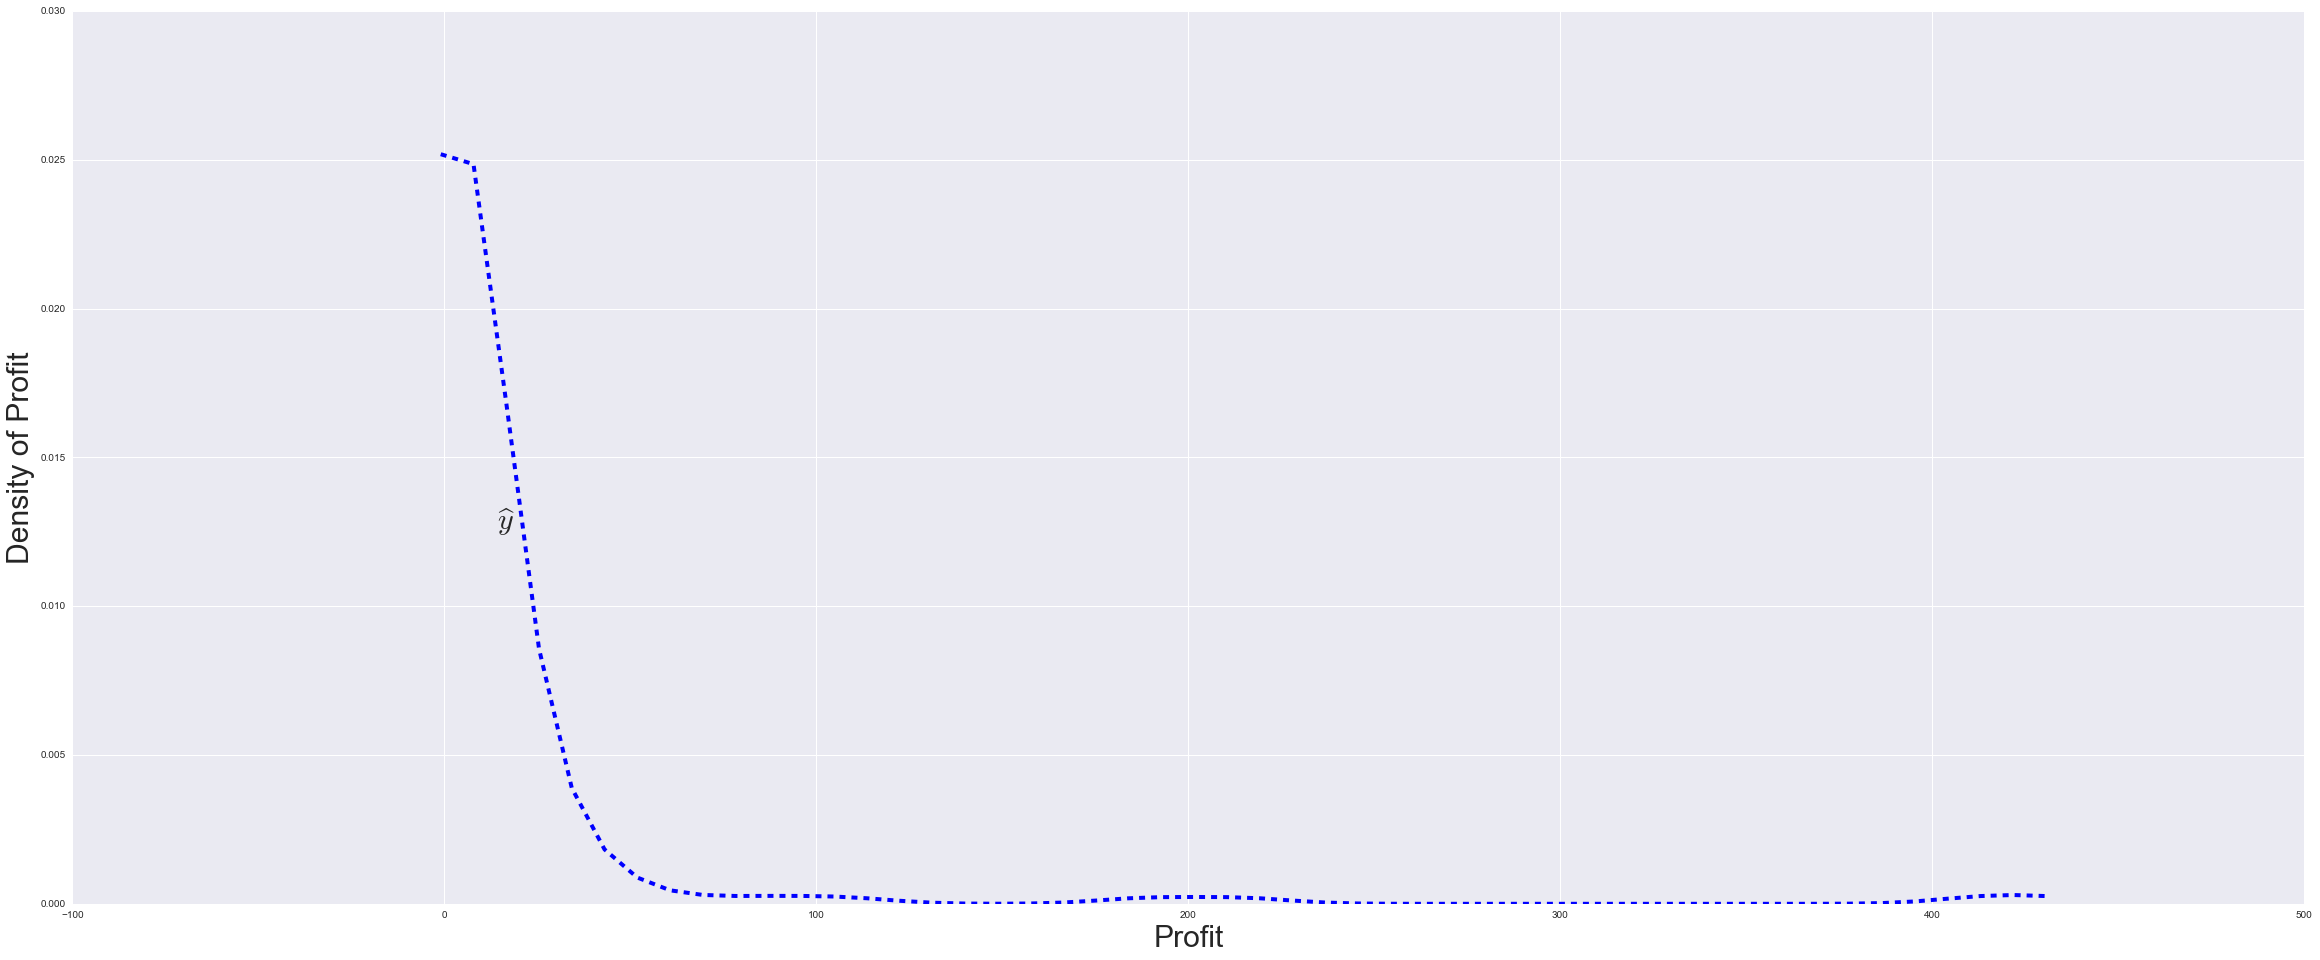

In [113]:
#compute the density for the first data
density_y = scipy.stats.gaussian_kde(y)    #use the scipy density calculator
density_y.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_y._compute_covariance()    #recompute using the new covariance factor

plt.figure(figsize = (40,16))    #initiate the plot
plt.plot(ys,density_y(ys),'b--',lw=4)    #generate the plot

#plt.fill(ys,density_y(ys),'b',alpha=0.3)    #fill in the curves
plt.xlabel('Profit',fontsize=30)    #add an x label
plt.ylabel('Density of Profit',fontsize=30)    #add a y label
plt.text(np.mean(y),max(density_y(ys))/2.0,r'$\widehat{y}$',fontsize=30)    #add LaTeX text for location of the mean

#plt.title('A Simple Density',fontsize=40)    #add a title to the plot
plt.grid(True)
plt.savefig('Density_of_Profit.pdf')    #save the plot to file
plt.show()    #and then show the plot

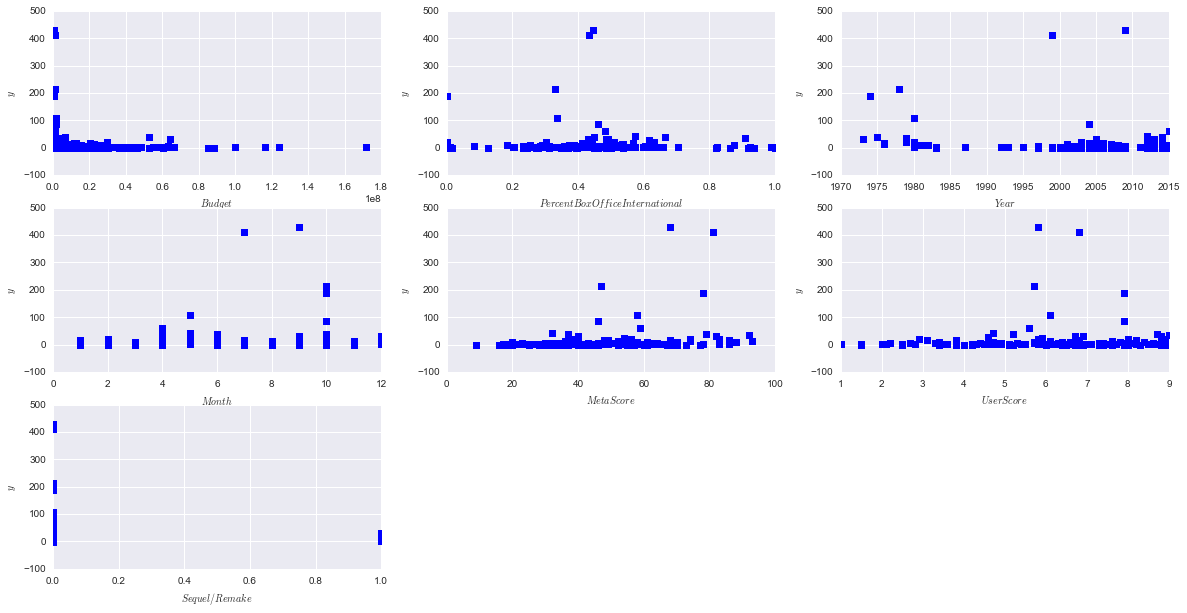

In [114]:
#The variables vs y
plt.figure(figsize = (20,10))    #initiate the plot

plt.subplot(3,3,1)    #plot subplot 1,1 in the 3x3 area
plt.plot(X['budget_i'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$Budget$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.subplot(3,3,2)    #plot subplot 1,2 in the 3x3 area
plt.plot(X['percent_int'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$Percent Box Office International$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.subplot(3,3,3)    #plot subplot 1,3 in the 3x3 area
plt.plot(X['year'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$Year$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.subplot(3,3,4)    #plot subplot 2,1 in the 3x3 area
plt.plot(X['month'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$Month$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.subplot(3,3,5)    #plot subplot 2,2 in the 3x3 area
plt.plot(X['metascore'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$Meta Score$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.subplot(3,3,6)    #plot subplot 2,3 in the 3x3 area
plt.plot(X['userscore'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$User Score$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.subplot(3,3,7)    #plot subplot 2,3 in the 3x3 area
plt.plot(X['seq_remake'],y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$Sequel / Remake$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

plt.savefig('Variable_Relationships_v_Profit.pdf')    #save the plot to file

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 3000)

Computing regularization path using the coordinate descent lasso...
[ -5.18332708e-07   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00]


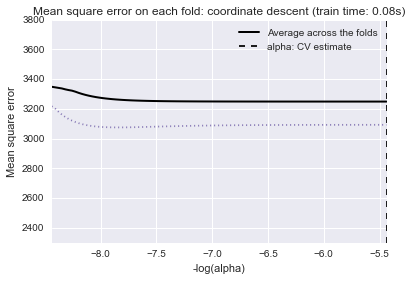

In [116]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
print model.coef_

Computing regularization path using the Lars lasso...


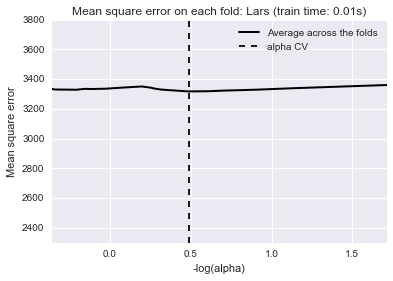

[ -3.43947562e-07   0.00000000e+00  -2.70970947e-01   1.58860835e+00
   5.47739525e-01   0.00000000e+00   0.00000000e+00]


In [117]:
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=3).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.cv_mse_path_, ':')
plt.plot(m_log_alphas, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()
print model.coef_

[ -3.43947562e-07   0.00000000e+00  -2.70970947e-01   1.58860835e+00
   5.47739525e-01   0.00000000e+00   0.00000000e+00]


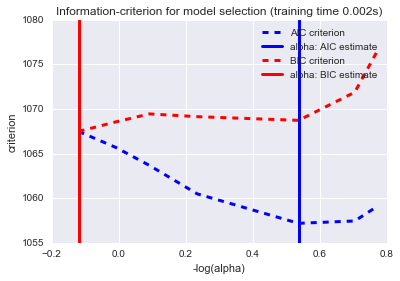

In [118]:
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
print model.coef_

In [119]:
# https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used